In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [164]:
data=pd.read_csv("data.csv")
data.drop(['id','Unnamed: 32'],axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [165]:
my_data=data.loc[:,'radius_mean':'fractal_dimension_worst']
Y_data=data.loc[:,'diagnosis']
x_data=(my_data-np.min(my_data))/(np.max(my_data)-np.min(my_data)).values


In [166]:
label=[]
Y=np.array([])
for i in range(len(Y_data)):
    if Y_data.loc[i]=="M":
        Y=np.append(Y,1)
    else:
        Y=np.append(Y,0)



In [167]:
X_train, X_test, y_train, y_test = train_test_split( x_data, Y, test_size=.9, random_state=42)
label=[]

for i in range(len(y_train)):
    if y_train[i]==1:
        label.append("red")
        
    else:
        label.append("blue")
        


In [168]:
import math
def sigmoid(z):
    sig=1/(1+math.exp(-z))
    return sig

In [169]:
teta=.1*np.ones((31,))


In [170]:
x=X_train.values
x=np.concatenate((np.ones((len(x),1)),x),axis=1)



In [171]:
def cost(x,y,teta):
    m=len(y)
    cost_value=0
    for i in range(m):
        h_teta=sigmoid(np.matmul(teta.T,x[i]))
        #print(h_teta)
        cost_iter=y[i]*(np.log(h_teta))+(1-y[i])*((np.log(1-h_teta)))
        cost_value=cost_value+ cost_iter
    return (-1/m)*cost_value

In [172]:
def calculate_weight(x,y,teta,rate):
    
    m=len(y)
    
    sum_error1=np.zeros((1,31))
   
    for i in range(m):
        #print(np.matmul(teta.T,x[i]))
        h_teta=sigmoid(np.matmul(teta.T,x[i]))
        #print(h_teta)
        sum_error1=sum_error1+((h_teta-y[i])*x[i])
    return teta-rate*sum_error1[0]

In [173]:
iter_cost=np.zeros((10000,))
for i in range(10000):
    teta=calculate_weight(x,y_train,teta,rate=0.001)
    iter_cost[i]=cost(x,y_train,teta)
    

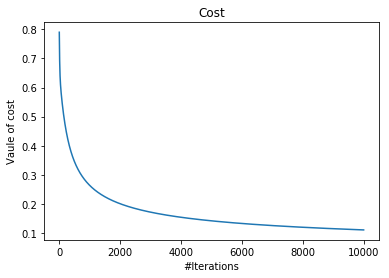

In [174]:
plt.plot(range(10000),iter_cost)
plt.title("Cost")
plt.xlabel("#Iterations")
plt.ylabel("Vaule of cost")
plt.show()

In [175]:
x_t=X_test.values
x_t.shape
x_t=np.concatenate((np.ones((513,1)),x_t),axis=1)

g_X_teta=np.matmul(teta.T,x_t.T)
y_predicted=np.ones(len(x_t))
for i in range(len(g_X_teta)):
    temp=sigmoid(g_X_teta[i])
    if temp <.5:
        y_predicted[i]=0
        
    
    

In [177]:
k=np.where(y_predicted+y_test==1)
error=(len(k[0])/len(x_t))*100
print("Accuraccy in Test data:", 100-error ,"%" )



Accuraccy in Test data: 95.12670565302145 %
